<a href="https://colab.research.google.com/github/mariimao/JSC270_HW2_2022_MZhao/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the [link](https://github.com/mariimao/JSC270_HW2_2022_MZhao) to my GitHub repo. Below are the import statements copied from the [starter code](https://github.com/UofT-JSC270/JSC270_HW2).

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
# import data
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None,
)

df.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "gross_income_group",
]

# Initial Data Exploration

## Columns of the data

In [21]:
# print basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Yes, they are the expected data types based on the descriptions in the [text file](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Using the `info()`, we can see that the columns such as `age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, and `hours-per-week` are `int64` type, which works well with the continuous numerical data types described in the text file. We have the rest of the columns (such as `workclass`, `education`, `marital_status`, etc.) as `object` types, which is useful for categorical data types.

## Missing values

We can see from the text file that missing values are indicated with ` ?` value (where there is a space in front of the question mark). So we can go through all the columns and count the number of times `?` appears. Also note that only `object` types can have ` ?` values.

We will also replace the missing values with `np.NaN`.

In [22]:
# go through each column and count the number of ' ?' occurences
for column in df.columns:
    count = (df[column] == " ?").sum()
    print(f"The column {column} has {count} missing values.")

# replaces the missing values with np.nan
df = df.replace(" ?", np.NaN)

Column age has 0 missing values.
Column workclass has 1836 missing values.
Column fnlwgt has 0 missing values.
Column education has 0 missing values.
Column education_num has 0 missing values.
Column marital_status has 0 missing values.
Column occupation has 1843 missing values.
Column relationship has 0 missing values.
Column race has 0 missing values.
Column sex has 0 missing values.
Column capital_gain has 0 missing values.
Column capital_loss has 0 missing values.
Column hours_per_week has 0 missing values.
Column native_country has 583 missing values.
Column gross_income_group has 0 missing values.


We find that `workclass` has 1836 missing values, `occupation` has 1843 missing values, `native_country` has 583 missing values, and the rest has zero.

## Data transformation and table

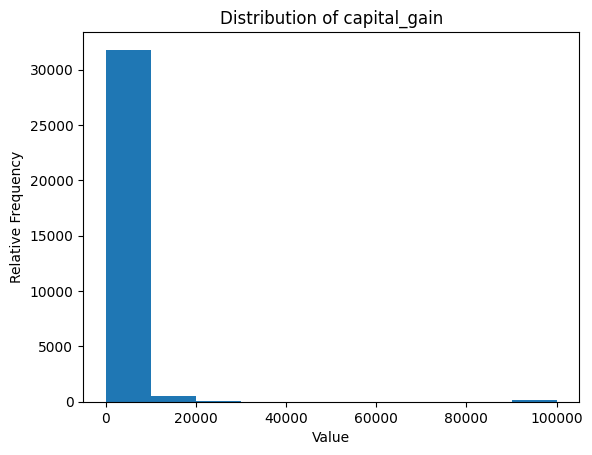

In [34]:
# Plot histogram of capital_gain
plt.hist(df.capital_gain, bins=10)
plt.title('Distribution of capital_gain')
plt.xlabel('Capital Gain (USD)')
plt.ylabel('Relative Frequency')
plt.show()

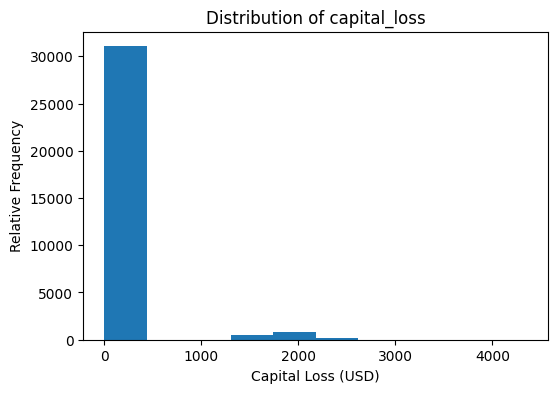

In [36]:
# Plot histogram of capital_loss
plt.hist(df.capital_loss, bins = 10)
plt.title('Distribution of capital_loss')
plt.xlabel('Capital Loss (USD)')
plt.ylabel('Relative Frequency')
plt.show()

These histograms do not tell us much other than the fact that most of the values are 0. Therefore, it will be more useful to use a categorical variable so we can see the presence of capital gain or loss can affect other variables. We will create two new variables, `has_capital_gain` and `has_capital_loss`, which will be binary variables. We can plot their distributions below.

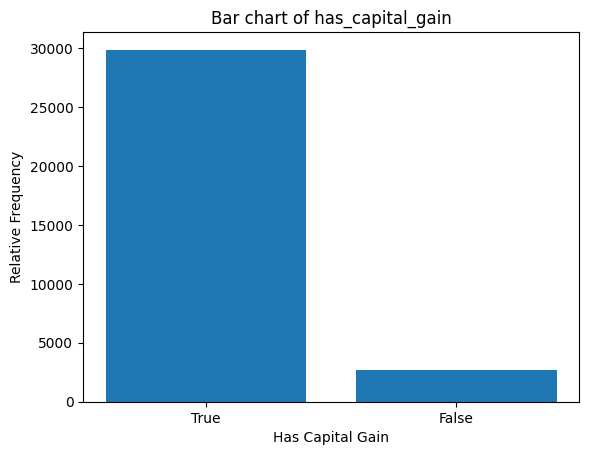

In [43]:
# Create has_capital_gain column
df['has_capital_gain'] = df.capital_gain > 0

# Plot bar chart of has_capital_gain
plt.bar(['True', 'False'], df.has_capital_gain.value_counts().values)
plt.title('Bar chart of has_capital_gain')
plt.xlabel('Has Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

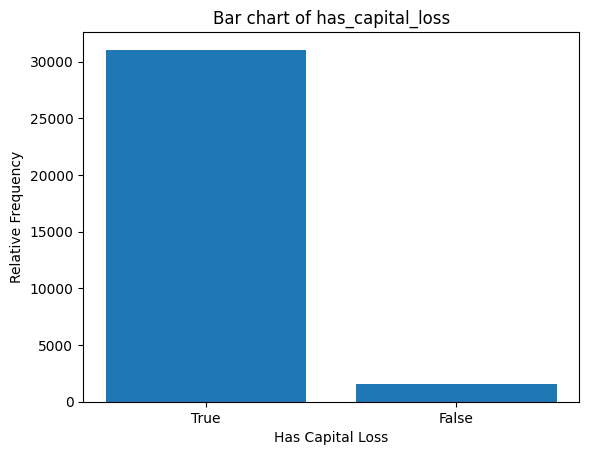

In [42]:
# Create has_capital_loss column
df['has_capital_loss'] = df.capital_loss > 0

# Plot bar chart of has_capital_loss
plt.bar(['True', 'False'], df.has_capital_loss.value_counts().values)
plt.title('Bar chart of has_capital_loss')
plt.xlabel('Has Capital Loss')
plt.ylabel('Relative Frequency')
plt.show()

## Explore distribution of fnlwgt

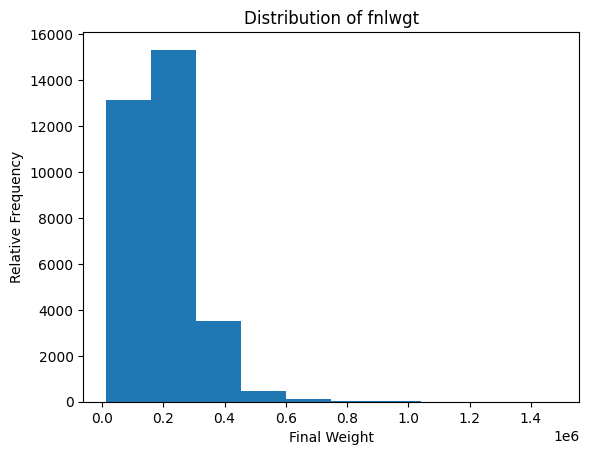

In [45]:
# Plot histogram of fnlwgt
plt.hist(df.fnlwgt, bins = 10)
plt.title('Distribution of fnlwgt')
plt.xlabel('Final Weight')
plt.ylabel('Relative Frequency')
plt.show()

We see that the variable is not symmetrically distributed. We can investigate further by exploring the distribution of this variable between men and women.

In [73]:
# Count how many are in each category
df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

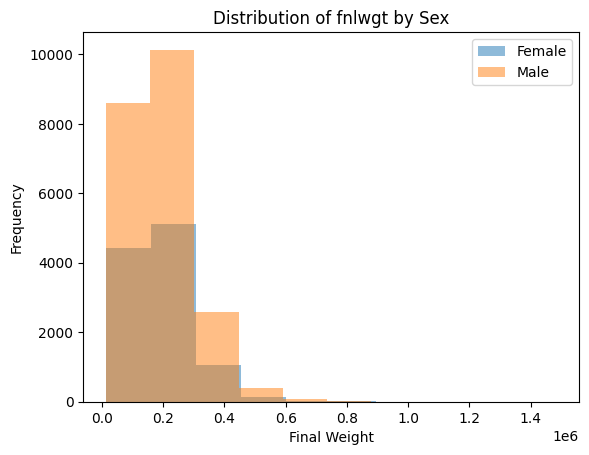

In [69]:
# Group by sex
grouped = df.groupby('sex')

# Plot histogram of fnlwgt by sex
grouped['fnlwgt'].hist(alpha=0.5, bins=10)
plt.title('Distribution of fnlwgt by Sex')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male'])
plt.grid(False)
plt.show()

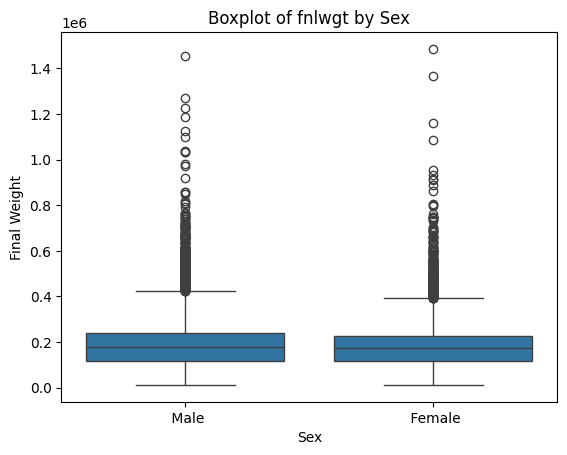

In [70]:
# Boxplot of fnlwgt by sex
sns.boxplot(x='sex', y='fnlwgt', data=df)
plt.title('Boxplot of fnlwgt by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Weight')
plt.show()

Keeping in mind that the number of men surveyed are twice as big as the number of women surveyed, we see from the histogram that both groups are still right-skewed. In the boxplot, we see there are a lot of outliers.

However, we should not exclude these outliers. Since we are dealing with a skewed distribution, removing them is not useful.

# Correlation

## Variable correlation

In [9]:
# @title 2. Correlation coefficient

In [10]:
# @title 3. Expected results

In [11]:
# @title 4. Covariance matrix

## Regression

In [12]:
# @title 1. Explanation of hours_per_week regression

In [13]:
# @title 2. Control variable

In [14]:
# @title 3. Model comparison